(114,)


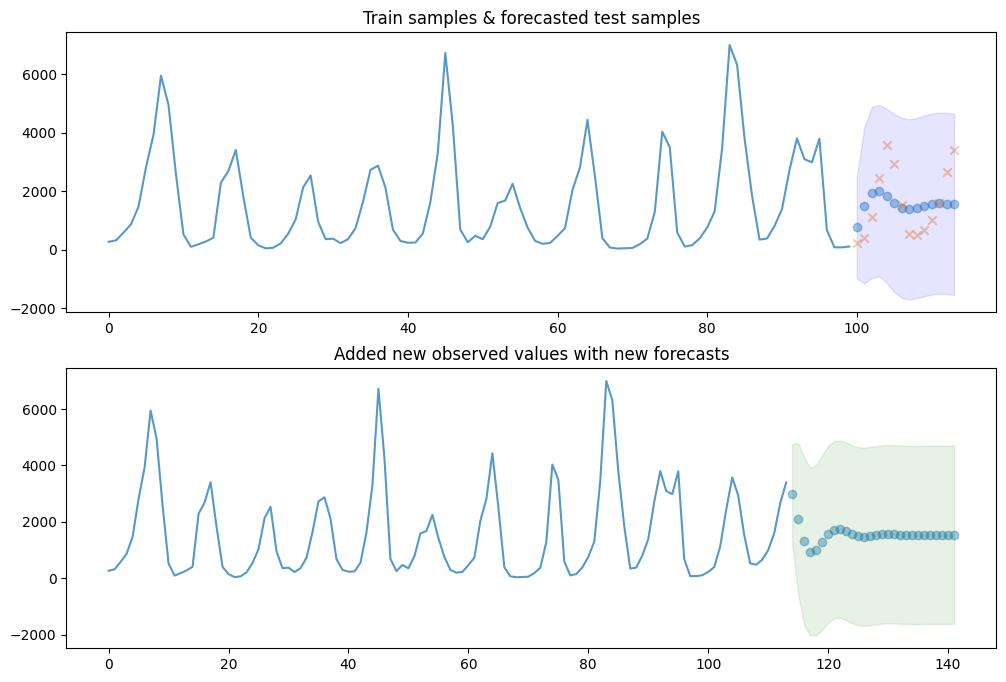

In [5]:



# Author: Taylor Smith <taylor.smith@alkaline-ml.com>

import pmdarima as pm
from pmdarima import model_selection
import matplotlib.pyplot as plt
import numpy as np

# #############################################################################
# Load the data and split it into separate pieces
data = pm.datasets.load_lynx()
print(data.shape)
train, test = model_selection.train_test_split(data, train_size=100)

# #############################################################################
# Fit with some validation (cv) samples
arima = pm.auto_arima(train, start_p=1, start_q=1, d=0, max_p=5, max_q=5,
                      out_of_sample_size=10, suppress_warnings=True,
                      stepwise=True, error_action='ignore')

# Now plot the results and the forecast for the test set
preds, conf_int = arima.predict(n_periods=test.shape[0],
                                return_conf_int=True)

fig, axes = plt.subplots(2, 1, figsize=(12, 8))
x_axis = np.arange(train.shape[0] + preds.shape[0])
axes[0].plot(x_axis[:train.shape[0]], train, alpha=0.75)
axes[0].scatter(x_axis[train.shape[0]:], preds, alpha=0.4, marker='o')
axes[0].scatter(x_axis[train.shape[0]:], test, alpha=0.4, marker='x')
axes[0].fill_between(x_axis[-preds.shape[0]:], conf_int[:, 0], conf_int[:, 1],
                     alpha=0.1, color='b')

# fill the section where we "held out" samples in our model fit

axes[0].set_title("Train samples & forecasted test samples")

# Now add the actual samples to the model and create NEW forecasts
arima.update(test)
new_preds, new_conf_int = arima.predict(n_periods=28, return_conf_int=True)
new_x_axis = np.arange(data.shape[0] + 28)

axes[1].plot(new_x_axis[:data.shape[0]], data, alpha=0.75)
axes[1].scatter(new_x_axis[data.shape[0]:], new_preds, alpha=0.4, marker='o')
axes[1].fill_between(new_x_axis[-new_preds.shape[0]:],
                     new_conf_int[:, 0],
                     new_conf_int[:, 1],
                     alpha=0.1, color='g')
axes[1].set_title("Added new observed values with new forecasts")
plt.show()